In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\barry\Downloads\Personality-Catagorization-main\Dataset.csv", delimiter='\t')

data.drop(data.columns[50:107], axis=1, inplace=True)
data.drop(data.columns[51:], axis=1, inplace=True)
data

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,...,2.0,4.0,3.0,4.0,2.0,4.0,2.0,2.0,4.0,US
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,...,1.0,5.0,1.0,5.0,1.0,3.0,4.0,5.0,4.0,US
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,...,1.0,5.0,1.0,4.0,1.0,5.0,5.0,4.0,5.0,US
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,...,2.0,4.0,2.0,3.0,2.0,4.0,5.0,5.0,3.0,US


In [3]:
data.isnull().values.sum()
data.dropna(inplace=True)
print('Number of participants after eliminating missing values: ', len(data))

Number of participants after eliminating missing values:  1013481


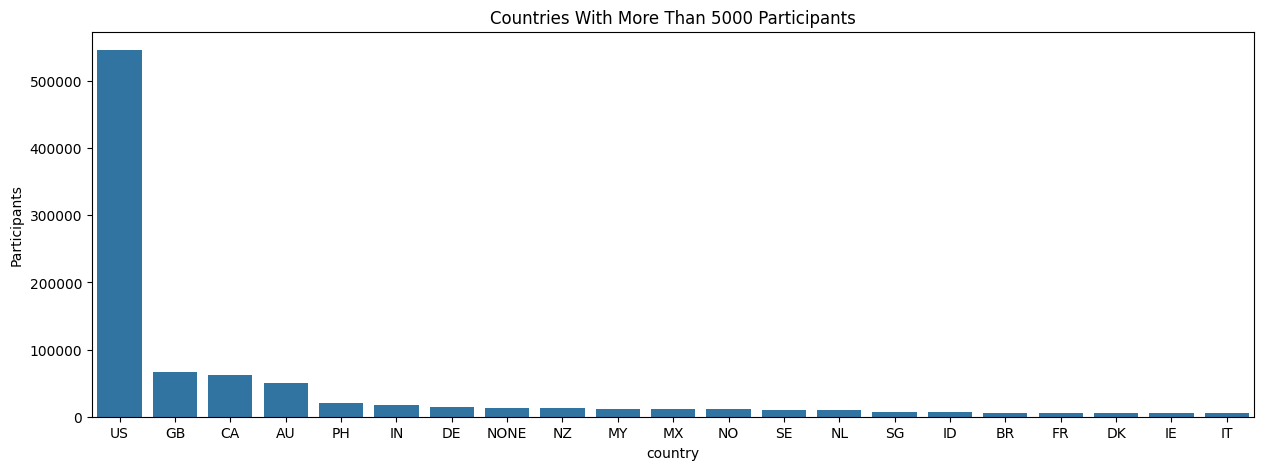

In [4]:
countries = pd.DataFrame(data['country'].value_counts())
countries_5000 = countries[countries['count'] >= 5000]

plt.figure(figsize=(15, 5))
sns.barplot(data=countries_5000, x='country', y='count')
plt.title('Countries With More Than 5000 Participants')
plt.ylabel('Participants')
plt.show()

In [5]:
def vis_questions(groupname, questions, color):
    plt.figure(figsize=(40,60))
    for i in range(1, 11):
        plt.subplot(10,5,i)
        plt.hist(data[groupname[i-1]], bins=14, color= color, alpha=.5)
        plt.title(questions[groupname[i-1]], fontsize=18)

In [6]:
from sklearn.cluster import KMeans

df_model = data.drop('country', axis=1)

kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(df_model)

c:\Users\barry\anaconda3\envs\tf2.10\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\barry\anaconda3\envs\tf2.10\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [7]:
pd.options.display.max_columns = 10
predictions = k_fit.labels_
df_model['Clusters'] = predictions
df_model.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,...,OPN7,OPN8,OPN9,OPN10,Clusters
0,4.0,1.0,5.0,2.0,5.0,...,5.0,3.0,4.0,5.0,3
1,3.0,5.0,3.0,4.0,3.0,...,4.0,2.0,5.0,3.0,0
2,2.0,3.0,4.0,4.0,3.0,...,5.0,3.0,4.0,4.0,0
3,2.0,2.0,2.0,3.0,4.0,...,4.0,4.0,3.0,3.0,4
4,3.0,3.0,3.0,3.0,5.0,...,5.0,3.0,5.0,5.0,3


In [8]:
df_model.Clusters.value_counts()

Clusters
1    225989
0    211785
3    211271
2    198255
4    166181
Name: count, dtype: int64

In [9]:
pd.options.display.max_columns = 150
df_model.groupby('Clusters').mean()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2.121774,3.300536,3.077106,3.667446,2.954600,2.706367,2.200250,4.002909,2.321472,4.139339,3.548920,3.046179,4.182109,2.583842,2.852128,2.835545,2.913488,2.477947,3.015870,2.749425,1.884151,3.934788,1.700654,4.355866,1.985353,4.152291,2.018542,3.982652,4.180740,3.716080,3.835281,2.230243,4.300630,2.033095,3.237623,2.079774,4.171754,2.022759,3.837481,3.893921,3.577180,2.142739,3.902930,2.063895,3.727219,1.965073,4.007153,2.992124,4.273310,3.816937
1,3.456779,1.910367,3.797897,2.498790,4.044737,1.828492,3.659457,2.761294,3.771064,2.993610,3.797826,2.937032,4.233728,2.418233,3.279722,3.454261,3.797136,3.445265,3.646704,3.163402,2.162720,4.272301,2.659714,4.177686,2.004580,3.991393,1.858564,3.893871,4.125621,3.844386,2.949688,3.615198,3.835965,3.240914,2.227586,3.532592,3.450146,2.831673,2.937046,3.474935,3.739576,2.114944,4.247154,1.965472,3.957918,1.771126,3.962662,3.375554,4.185336,4.202536
2,1.813518,3.624579,2.230652,4.050778,2.283211,3.194285,1.746367,4.062077,2.184439,4.471015,4.244014,2.464170,4.498530,2.147936,3.556258,3.856175,3.989695,3.760430,4.006814,3.931649,2.511619,3.325157,2.619308,3.791798,2.596414,3.812166,2.750927,3.398532,3.633094,3.039131,2.789503,3.374210,3.803304,3.493249,2.076820,3.521283,3.546927,3.059060,2.758795,3.298197,3.499750,2.383330,4.062137,2.138786,3.431762,2.089637,3.674843,3.180404,4.271514,3.722110
3,3.459036,1.957656,4.332573,2.232360,4.255056,1.674536,3.872898,2.822806,3.729049,2.529524,2.322936,3.821116,3.157693,3.283210,2.112306,1.898017,2.106574,1.673353,2.113499,1.718404,1.891111,4.429524,1.822834,4.250157,1.856062,3.851130,1.588846,4.099237,4.102877,4.193978,3.724302,2.566874,4.197344,1.888305,3.149206,2.267188,3.877868,1.929271,3.590161,3.878620,3.882184,1.756133,4.079235,1.796669,4.155492,1.656361,4.313668,3.230088,4.097959,4.291233
4,2.183824,3.295022,2.799093,3.410576,2.585855,2.768066,2.116289,3.534381,2.641235,3.793520,2.336194,3.628814,2.989758,2.927350,2.316005,2.002551,2.288697,1.908816,2.565817,2.233547,3.011530,2.941931,2.556117,2.793117,3.135653,2.664035,2.989560,2.863613,2.619698,2.986972,3.151582,2.823476,3.672935,2.399065,2.377336,2.732563,3.383955,2.504101,2.779873,3.343914,3.533262,1.977633,3.613085,2.057829,3.621978,2.043037,3.886714,3.104260,3.701205,3.665660


In [10]:
col_list = list(df_model)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums = pd.DataFrame()
data_sums['extroversion'] = df_model[ext].sum(axis=1)/10
data_sums['neurotic'] = df_model[est].sum(axis=1)/10
data_sums['agreeable'] = df_model[agr].sum(axis=1)/10
data_sums['conscientious'] = df_model[csn].sum(axis=1)/10
data_sums['open'] = df_model[opn].sum(axis=1)/10
data_sums['clusters'] = predictions
data_sums.groupby('clusters').mean()

,extroversion,neurotic,agreeable,conscientious,open
clusters,,,,,
0,3.049180,3.020545,3.191112,3.164256,3.246856
1,3.072249,3.417331,3.299084,3.209574,3.352228
2,2.966092,3.645567,3.147815,3.172135,3.245427
3,3.086550,2.420711,3.208576,3.106914,3.325902
4,2.912786,2.519755,2.856222,2.916880,3.120466


In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df_model)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = predictions
df_pca.head()

,PCA1,PCA2,Clusters
0,-5.522630,-1.099631,3
1,0.396777,1.942258,0
2,-0.485475,1.296559,0
3,0.884997,1.102632,4
4,-4.766035,1.724102,3


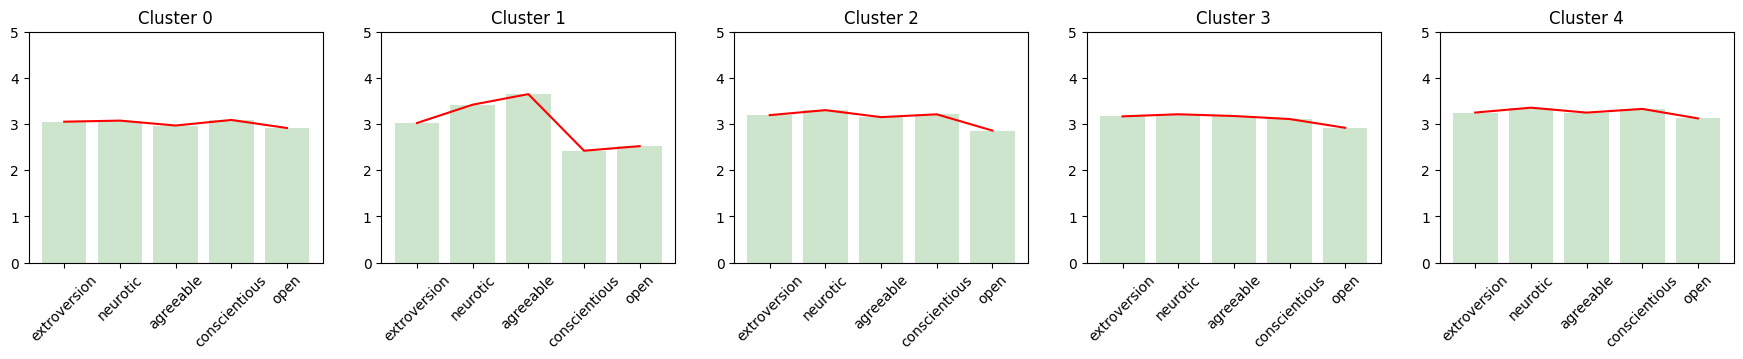

In [12]:
dataclusters = data_sums.groupby('clusters').mean()
plt.figure(figsize=(22,3))
for i in range(0, 5):
    plt.subplot(1,5,i+1)
    plt.bar(dataclusters.columns, dataclusters.iloc[:, i], color='green', alpha=0.2)
    plt.plot(dataclusters.columns, dataclusters.iloc[:, i], color='red')
    plt.title('Cluster ' + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0,5)

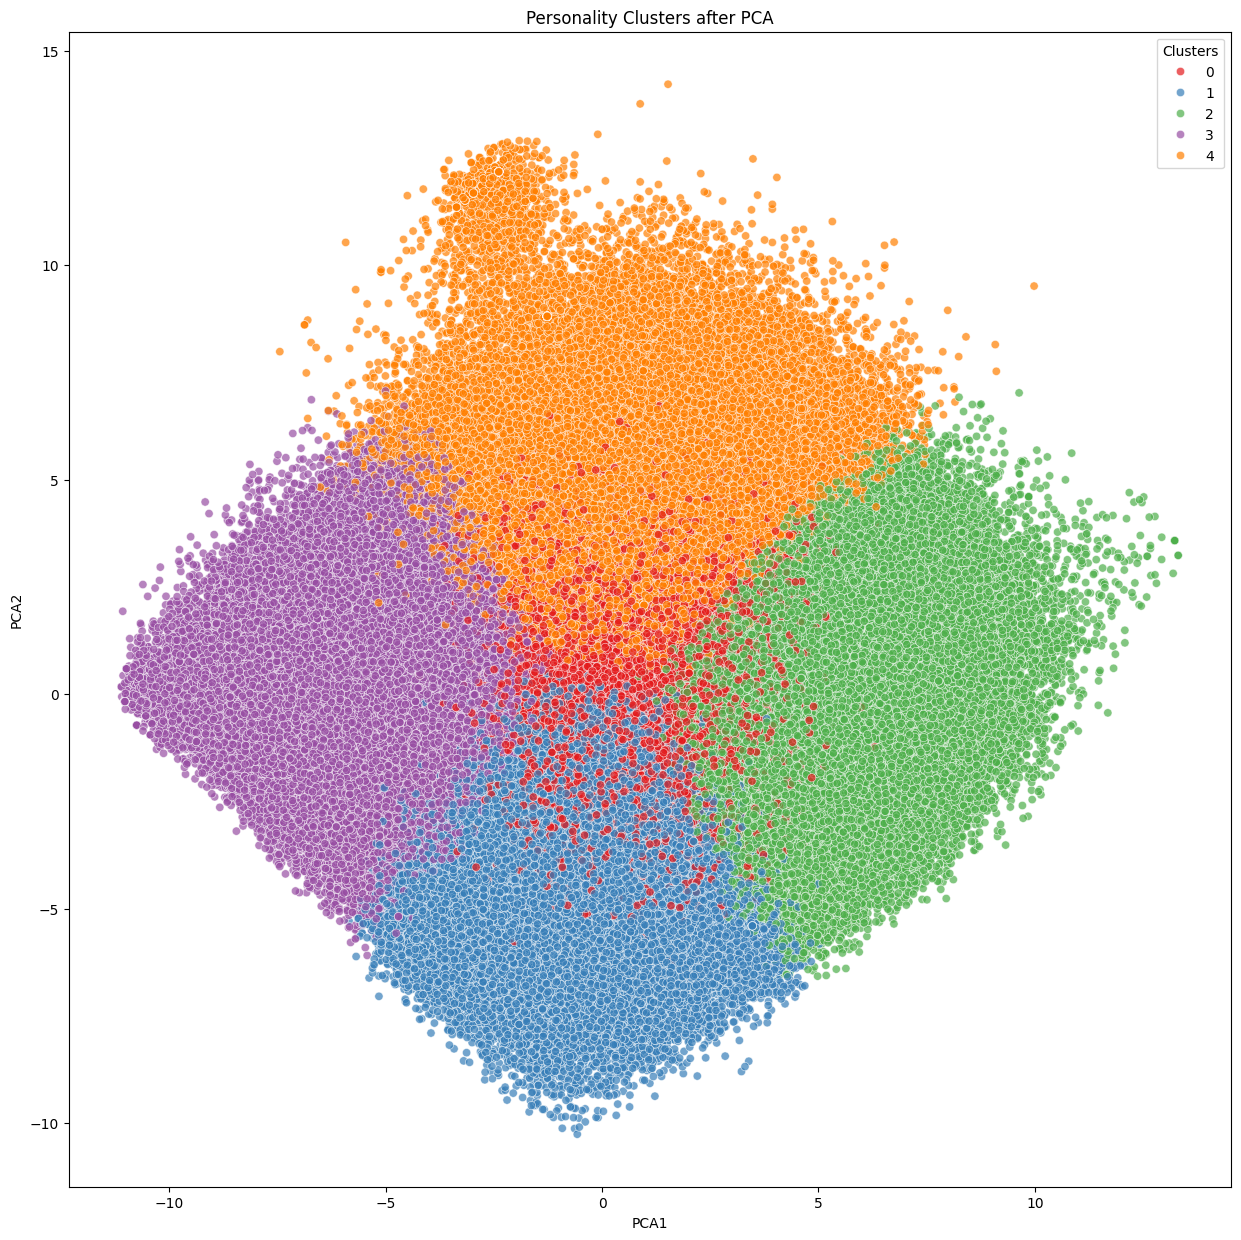

In [13]:
plt.figure(figsize=(15,15))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set1', alpha=0.7)
plt.title('Personality Clusters after PCA');

In [14]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
X, y = make_blobs(random_state=42)
kmeans = KMeans(n_clusters=2, random_state=42)
silhouette_score(X, kmeans.fit_predict(X))

0.496137786540463